In [3]:
#Cargamos libreria
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
#Cargamos nuestros datos.
precio_casas = pd.read_csv("data/kc_house_data.csv")

In [45]:
#Hacemos una breve descripcion de nuestros datos
precio_casas.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [46]:
#Limpieamos los valores nulos
precios_casas = precio_casas.fillna(method="ffill")

Modelo de regresion libeal simpe,
por que solamente se tomara una columna para poder predecir otra

In [47]:
# asignamos las variables que vamos a analizar
datos = precio_casas['sqft_living']
precio = precio_casas['price']

In [48]:
#Convertimos los datos a una matriz de tipo numpy para poder operar con ellos de mejor forma.
x = np.array(datos).reshape(-1,1)
y = np.array(precio)

In [49]:
#Separamos los datos de prueba y los datos de testing.
from sklearn.model_selection import train_test_split
#Creamos los conjuntos de entrenamiento.
#Recordemos que la funcion test_size obtiene la cantidad de datos para entrenamiento.
#
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=1/3,random_state=0)

In [50]:
#Generamos el modelo de regresion Lineal.
from sklearn.linear_model import LinearRegression
#Recordemos que usamos el objeto LinearRegression para poder entrenar nuestro modelo.
#El metodofit sirve para que nosotros indiquemos el conjunto de datos a entrenar
regresion = LinearRegression()
regresion.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
#Validamos nuestro modelo con nuestra base de pruebas y asignamos los precios de las casas en base a los emtros cuadrados.
prediccion = regresion.predict(xtest)
prediccion

array([ 362496.90888926, 1249614.79894487,  365234.92706844, ...,
        482969.70877335,  288570.41805129,  255714.19990108])

Graficamos nuestro Modelo. 

Esto es importante para veer si hay alguna infroamcion de valor en nuestros datos y ver como se comporta nuestro modelo , con respecto a los datos.

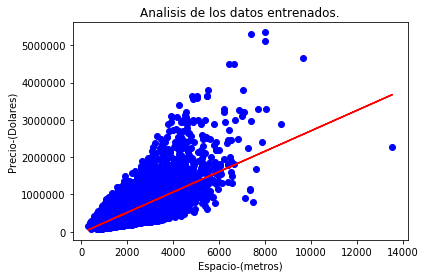

In [52]:
# graficaremos nuestra base de entrenamiento.
plt.scatter(xtrain,ytrain,color="blue")
plt.plot(xtrain,regresion.predict(xtrain),color="red")
plt.title("Analisis de los datos entrenados.")
plt.xlabel("Espacio-(metros)")
plt.ylabel("Precio-(Dolares)")
plt.show()

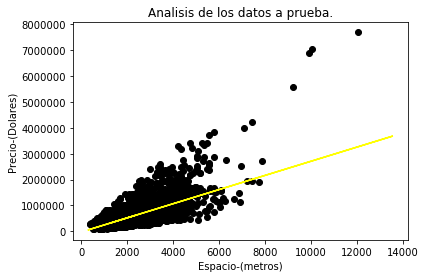

In [53]:
#Graficaremos nuestra base de prueba
plt.scatter(xtest,ytest,color="black")
plt.plot(xtrain,regresion.predict(xtrain),color="yellow")
plt.title("Analisis de los datos a prueba.")
plt.xlabel("Espacio-(metros)")
plt.ylabel("Precio-(Dolares)")
plt.show()

# Calculamos el coef de determinacion ($R2$).

Este valida en una escala del 0 al 1 si nuestro modelo es bueno o no si llega a 0.99 es bueno .

In [54]:
coef = regresion.score(xtest,ytest)

In [55]:
print("El coeficiente es: {}% , esto nos dice que nuestro modelo es medianamente correcto para nuestros datos & como en la vida cotidiana no solo se toma una variable para evaluacion de una cass si no se tomas mas, por eso concluimos que nuestro modelo no es correcto. ".format(int(round(coef*100))))

El coeficiente es: 50% , esto nos dice que nuestro modelo es medianamente correcto para nuestros datos & como en la vida cotidiana no solo se toma una variable para evaluacion de una cass si no se tomas mas, por eso concluimos que nuestro modelo no es correcto. 


# Seguna parte - (Modelo De regresion Lineal Multilpe).

Como se observo   en nuestro modelo pasado , no se llego a un coeficiente de determinacion bueno debido a que solo tomabamos una variable para calcular el precio, en  este caso tomaremos mas variables como la cantidad de baños, cuartos entre otros. 

Revisamos todos los campos de nuestro df para ver cuales son los campos correctos que se ajustan a nuestro modelo.

In [92]:
all_params = list(precios_casas)

In [93]:
#Asignamos los valores que creemos nos pueden ser de utilidad para el modelo.
x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront','condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built','sqft_living15', 'sqft_lot15','yr_renovated']

#En esta parte del codigo buscamos los factores que deberian salir de nuestro modelo.
print(list(set(all_params) - set(x_vars)))

['view', 'date', 'id', 'price', 'zipcode', 'lat', 'long']


In [94]:
#Asignamos a la variable precio_ casa los atributos que creemos correctos para nuestro entrenamiento.
y = precios_casas.iloc[:, 2].values
precios_casas = precios_casas.drop(['date','price','lat', 'zipcode', 'view', 'id', 'long'], axis =1)
X = precios_casas.iloc[:, ].values

In [95]:
#Separamos los datos en entrenamiento y testing.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [97]:
#Aplicamos un scaler para normalizar  nuestros esto quiere decir que  datos sean optimos y poder ajustarlos al modelo.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [98]:
#Entrenamos nuestro modelo con los datos de entrenamiento.
from sklearn.linear_model import LinearRegression
#Recordemos que usamos el objeto LinearRegression para poder entrenar nuestro modelo.
#El metodofit sirve para que nosotros indiquemos el conjunto de datos a entrenar
regresion = LinearRegression()
regresion.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
#Consultamos nuestro coef R2
coef = regresion.score(X_test,y_test)
print("El coeficiente de determinacion es  : {}%, sin embargo no es suficientemente bueno , para esto deberiamos de agregar mas variables para asi poder mejoraralo".format(int(round(coef * 100))))

El coeficiente de determinacion es  : 64%, sin embargo no es suficientemente bueno , para esto deberiamos de agregar mas variables para asi poder mejoraralo
